In [1]:
import cv2
import matplotlib.pylab as plt
import numpy as np
import os

from logger import Logger
from mathtools import MathTools
from services import Services
from tools import Colors

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
def single_triplet(single):

    triplet = np.zeros((single.shape[0], single.shape[1], 3), 'float32')
    triplet[:,:,0] = single
    triplet[:,:,1] = single
    triplet[:,:,2] = single
    return triplet

def triplet_single(triplet):

    single = triplet[:,:,0]
    return single

def process(label, tonemap, single):

    triplet = single_triplet(single)
    triplet = tonemap.process(triplet)
    result = triplet_single(triplet)
    
    MathTools.print_array(label, result)
    plot(single, result)
    return result

def plot(single, result):
    x = np.linspace(start=0, stop=single.shape[1], num=single.shape[1])
    plt.plot(x, result[0])
    plt.show()


In [3]:
single = np.array([[1, 2, 2, 1, 100, 100, 1, 2, 2, 1, 20, 20, 1, 4, 4, 1 ]])
MathTools.print_array("Original", single)


Original

    1.00    2.00    2.00    1.00  100.00  100.00    1.00    2.00    2.00    1.00   20.00   20.00    1.00    4.00    4.00    1.00




ToneMap

    0.00    0.01    0.01    0.00    1.00    1.00    0.00    0.01    0.01    0.00    0.19    0.19    0.00    0.03    0.03    0.00



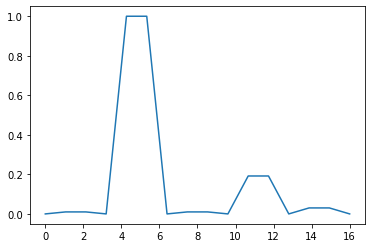

In [4]:
tonemap = cv2.createTonemap(1.0)
result = process("ToneMap", tonemap, single)




Reinhard

     nan     nan     nan     nan     nan     nan     nan     nan     nan     nan    0.00    0.00     nan    0.00    0.00     nan



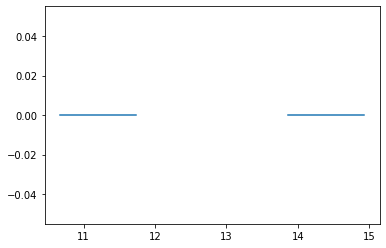

In [5]:
reinhard = cv2.createTonemapReinhard(0)
result = process("Reinhard", reinhard, single)